In [3]:
import os
os.chdir("../../../")

In [4]:
import torch
from torchts.nn.models.ode import ODESolver

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [7]:
# Equations
def x_prime(prev_val, coeffs):
    return prev_val["x_"]

def x_prime_prime(prev_val, coeffs):
    return -prev_val["x"] - coeffs["alpha"]*prev_val["x"]*prev_val["y"]

def y_prime(prev_val, coeffs):
    return prev_val["y_"]

def y_prime_prime(prev_val, coeffs):
    return -prev_val["y"] - (prev_val["x"]*prev_val["x"] - prev_val["y"]*prev_val["y"])

ode = {"x": x_prime, "x_": x_prime_prime, "y": y_prime, "y_": y_prime_prime}


# Initial conditions: (0, 0.436630946376151, 0.095, 0.03)

In [23]:
ode_init = {"x":0., "x_": 0.436630946376151, "y": 0.095, "y_": 0.03}

# Constants (Parameters)
ode_coeffs = {"alpha": 2.}

ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=0.01,
    solver="rk4",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(100000)

In [24]:
result

tensor([[0.0000, 0.4366, 0.0950, 0.0300],
        [0.0044, 0.4366, 0.0953, 0.0291],
        [0.0087, 0.4365, 0.0956, 0.0283],
        ...,
        [0.0182, 0.4362, 0.0965, 0.0257],
        [0.0226, 0.4359, 0.0968, 0.0248],
        [0.0269, 0.4356, 0.0970, 0.0239]], grad_fn=<StackBackward>)

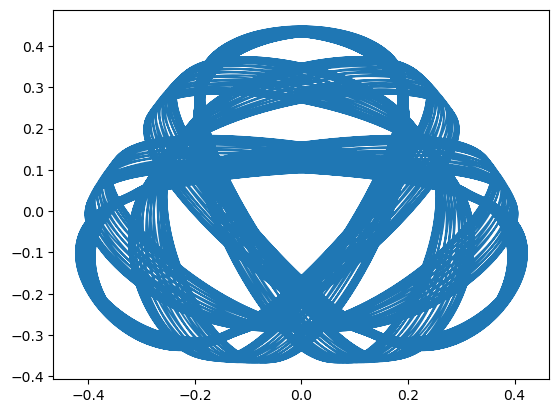

In [25]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Y
plt.plot(result_np[:,0], result_np[:,2])

plt.show()

# Initial conditions (0, 0.427001854016272, 0.095, 0.096)

In [26]:
ode_init = {"x":0., "x_": 0.427001854016272, "y": 0.095, "y_": 0.096}

# Constants (Parameters)
ode_coeffs = {"alpha": 2.}

ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=0.01,
    solver="rk4",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(100000)

In [27]:
result

tensor([[ 0.0000,  0.4270,  0.0950,  0.0960],
        [ 0.0043,  0.4270,  0.0960,  0.0951],
        [ 0.0085,  0.4269,  0.0969,  0.0943],
        ...,
        [-0.1285, -0.1269, -0.2972,  0.2671],
        [-0.1298, -0.1264, -0.2945,  0.2708],
        [-0.1310, -0.1258, -0.2918,  0.2744]], grad_fn=<StackBackward>)

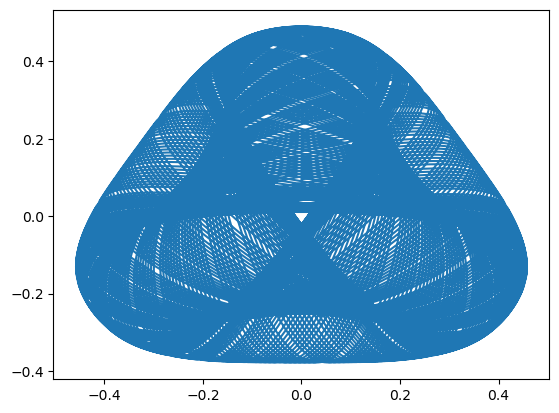

In [28]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Y
plt.plot(result_np[:,0], result_np[:,2])

plt.show()